In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('C:\\Users\\ANU\\Downloads\\Iris.csv')
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Id","Species"],axis=1), df["Species"], test_size=0.3, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [15]:
#fiting the data
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
predictions = dtc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [19]:
print(confusion_matrix(y_test,predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Results: I was able to get an accuracy of 100% on predicting the species

# Visualizing the Decision Tree

[Text(257.53846153846155, 504.7714285714286, 'X[3] <= 0.8\nentropy = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(193.15384615384616, 427.11428571428576, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(321.9230769230769, 427.11428571428576, 'X[2] <= 4.75\nentropy = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(128.76923076923077, 349.4571428571429, 'X[3] <= 1.6\nentropy = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(64.38461538461539, 271.8, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(193.15384615384616, 271.8, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 349.4571428571429, 'X[3] <= 1.75\nentropy = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(321.9230769230769, 271.8, 'X[2] <= 4.95\nentropy = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(257.53846153846155, 194.14285714285717, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(386.3076923076923, 194.14285714285717, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nva

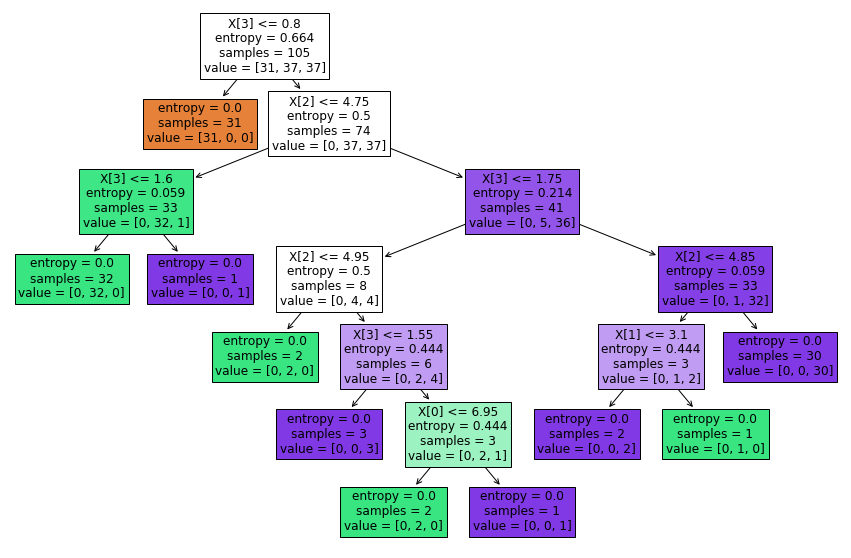

In [20]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)